Wk 04 Exercises

Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

In [2]:
# numpy efficiently deals with numerical multi-dimensional arrays.
import numpy as np

# matplotlib is a plotting library, and pyplot is its easy-to-use module.
import matplotlib.pyplot as plt

# This just sets the default plot size to be bigger.
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
w = np.arange(0.0, 21.0, 1.0)
d = 5.0 * w + 10.0 + np.random.normal(0.0, 5.0, w.size)

Let's have a look at the data from our experiment.

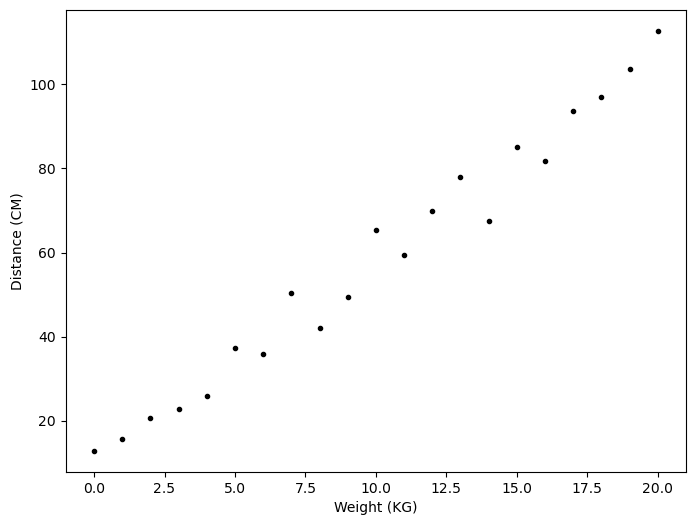

In [4]:
# Create the plot.

plt.plot(w, d, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

<h3 style="color: rgb(0, 91, 94);">Model</h3>

It looks like the data might indeed be linear.

The points don't exactly fit on a straight line, but they are not far off it.

We might put that down to some other factors, such as the air density, or errors, such as in our tape measure.

Then we can go ahead and see what would be the best line to fit the data.

<h3 style="color: rgb(0, 91, 94);">Straight lines</h3>

All straight lines can be expressed in the form $y = mx + c$.

The number $m$ is the slope of the line.

The slope is how much $y$ increases by when $x$ is increased by 1.0.

The number $c$ is the y-intercept of the line.

It's the value of $y$ when $x$ is 0.

<h3 style="color: rgb(0, 91, 94);">Fitting the model</h3>

To fit a straight line to the data, we just must pick values for $m$ and $c$.

These are called the parameters of the model, and we want to pick the best values possible for the parameters.

That is, the best parameter values *given* the data observed.

Below we show various lines plotted over the data, with different values for $m$ and $c$.

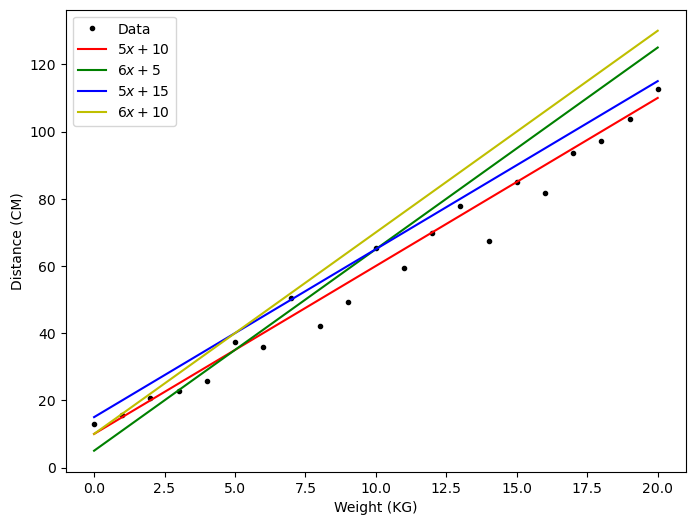

In [16]:
# Plot w versus d with black dots.
plt.plot(w, d, 'k.', label="Data")

# Overlay some lines on the plot.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, 5.0 * x + 10.0, 'r-', label=r"$5x + 10$")
plt.plot(x, 6.0 * x +  5.0, 'g-', label=r"$6x +  5$")
plt.plot(x, 5.0 * x + 15.0, 'b-', label=r"$5x + 15$")
plt.plot(x, 6.0 * x + 10.0, 'y-', label=r"$6x + 10$")

# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')

# Show the plot.
plt.show()

<h3 style="color: rgb(0, 91, 94);">Calculating the cost</h3>

You can see that each of these lines roughly fits the data.

Which one is best, and is there another line that is better than all three?

Is there a *best* line?


It depends how you define the word best.

Luckily, everyone seems to have settled on what the best means.

The best line is the one that minimises the following calculated value.

$$ \sum_i (y_i - mx_i - c)^2 $$

Here $(x_i, y_i)$ is the $i^{th}$ point in the data set and $\sum_i$ means to sum over all points. 

The values of $m$ and $c$ are to be determined.


We usually denote the above as $Cost(m, c)$.

Where does the above calculation come from?

It's easy to explain the part in the brackets $(y_i - mx_i - c)$.

The corresponding value to $x_i$ in the dataset is $y_i$.

These are the measured values.

The value $m x_i + c$ is what the model says $y_i$ should have been.

The difference between  the value that was observed ($y_i$) and the value that the model gives ($m x_i + c$), is $y_i - mx_i - c$.

<h3 style="color: rgb(0, 91, 94);">Why square that value?</h3>

Well note that the value could be positive or negative, and you sum over all of these values.

If we allow the values to be positive or negative, then the positive could cancel the negatives.

So, the natural thing to do is to take the absolute value $\mid y_i - m x_i - c \mid$.

Well it turns out that absolute values are a pain to deal with, and instead it was decided to just square the quantity instead, as the square of a number is always positive.

There are pros and cons to using the square instead of the absolute value, but the square is used.

This is usually called *least squares* fitting.

MY OWN WORK HERE

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [ ]:
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

In [22]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(d[i] - m * w[i] - c) for i in range(w.size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 10.0, cost(5.0, 10.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0,  5.0, cost(6.0,  5.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (5.0, 15.0, cost(5.0, 15.0)))
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (6.0, 10.0, cost(6.0, 10.0)))



Cost with m =  5.00 and c = 10.00:   -33.41
Cost with m =  6.00 and c =  5.00:  -138.41
Cost with m =  5.00 and c = 15.00:  -138.41
Cost with m =  6.00 and c = 10.00:  -243.41


<h3 style="color: rgb(0, 91, 94);">Minimising the cost</h3>

We want to calculate values of $m$ and $c$ that give the lowest value for the cost value above.

For our given data set we can plot the cost value/function.

Recall that the cost is:

$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

This is a function of two variables, $m$ and $c$, so a plot of it is three dimensional.

See the **Advanced** section below for the plot.

<br>

In the case of fitting a two-dimensional line to a few data points, we can easily calculate exactly the best values of $m$ and $c$.

Some of the details are discussed in the **Advanced** section, as they involve calculus, but the resulting code is straight-forward.

We first calculate the mean (average) values of our $x$ values and that of our $y$ values.

Then we subtract the mean of $x$ from each of the $x$ values, and the mean of $y$ from each of the $y$ values.

Then we take the *dot product* of the new $x$ values and the new $y$ values and divide it by the dot product of the new $x$ values with themselves.

That gives us $m$, and we use $m$ to calculate $c$.

Remember that in our dataset $x$ is called $w$ (for weight) and $y$ is called $d$ (for distance).

We calculate $m$ and $c$ below.

In [23]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(w)
d_avg = np.mean(d)

# Subtract means from w and d.
w_zero = w - w_avg
d_zero = d - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.868265 and c is 9.726308.


Note that numpy has a function that will perform this calculation for us, called polyfit.
It can be used to fit lines in many dimensions.

In [24]:
np.polyfit(w, d, 1)

array([4.86826532, 9.72630844])

<h3 style="color: rgb(0, 91, 94);">Best fit line</h3>

So, the best values for $m$ and $c$ given our data and using least squares fitting are about $4.95$ for $m$ and about $11.13$ for $c$.

We plot this line on top of the data below.

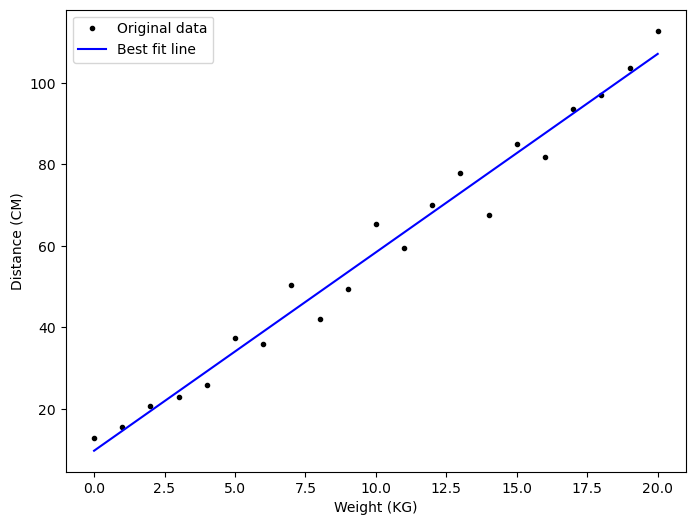

In [13]:
# Plot the best fit line.
plt.plot(w, d, 'k.', label='Original data')
plt.plot(w, m * w + c, 'b-', label='Best fit line')

# Add axis labels and a legend.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.legend()

# Show the plot.
plt.show()

Note that the $Cost$ of the best $m$ and best $c$ is not zero in this case.

In [25]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.87 and c =  9.73:    -0.00


Why done we use absolute values? 
In plain English, we can describe the problem this way. We already know that we could draw a bunch of dotted lines on a scatterplot
and measure the total distance of all those lines. We could then try different regression lines and repeat the process. We would prefer
to find a quick and easy way to find the line that minimizes the sum of the errors. Using absolute values does not make the process
any easier for us. In fact, using absolute values requires us to basically go through the entire process of drawing regression lines,
measuring the error distances, and summing those errors. We could use a computer to do this (using something called Wesolowsky’s
direct descent method), but we still wouldn’t understand what’s going on.
Let me stress that we would really like to use those absolute value bars in our formula. Absolute values are the easiest way to make all
values positive and absolute values make sense. We simply choose not to use absolute values because of the difficulties we
have in working with them mathematically.